# **Taller de Aprendizaje Automático en Python - Día 3**

## **Autores:**



*   José Clemente Hernández Hernández
*   Gustavo Adolfo Vargas Hákim

# **Algoritmo de K Medias**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

Tomamos la base de datos de ejemplo

In [2]:
X = np.array([[0.9, 2.5],
              [1.7, 1.8],
              [1.1, 3.9],
              [2., 3.],
              [3.5, 2.1],
              [4.6, 0.8],
              [1., 7.],
              [3.5, 5.7],
              [3.9, 4.1],
              [5, 3.1],
              [5., 5.],
              [6.5, 6.]])

mius = np.array([[4.6, 1.8],
                 [3.9, 6.2]])

Graficamos...

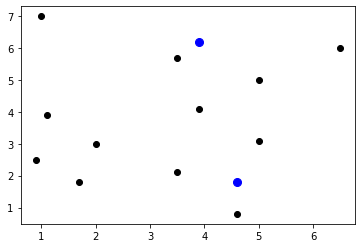

In [20]:
plt.plot(X[:, 0], X[:, 1], "ko")
plt.plot(mius[:, 0], mius[:, 1], 'bo', markersize=8)
plt.show()

Entrenamos el algoritmo, diciéndole cuántos cluster queremos

In [15]:
n = 2
k_means = KMeans(n_clusters=n, init = mius)
k_means.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(algorithm='auto', copy_x=True,
       init=array([[4.6, 1.8],
       [3.9, 6.2]]), max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [16]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

Graficamos los nuevos centroides y las etiquetas para los puntos

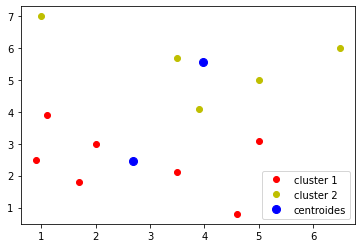

In [21]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'ro', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'yo', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'bo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

In [22]:
centroides

array([[2.68571429, 2.45714286],
       [3.98      , 5.56      ]])

**Base de datos IRIS, con dos características y sin etiquetas**

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/GustavoVargasHakim/Machine-Learning-en-Python/main/iris.csv")

Observamos que la base de datos viene etiquetada, sin embargo, para el KMeans, estas etiquetas serán eliminadas

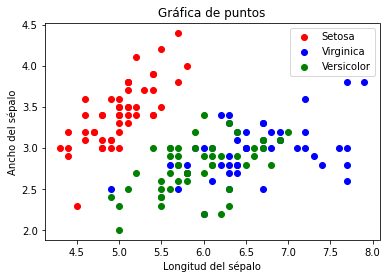

In [35]:
colores = ['red', 'blue', 'green'] #Definimos una lista con los colores que queremos
clases = ['Setosa', 'Virginica', 'Versicolor']
'''Iteramos sobre las tres clases que tenemos'''
for i in range(3): 
  clase_i = clases[i]
  data_i = data.loc[data['variety'] == clase_i]
  plt.scatter(data_i['sepal.length'], data_i['sepal.width'], color = colores[i], label = clases[i])

plt.title('Gráfica de puntos') #Título de la gráfica
plt.xlabel('Longitud del sépalo') #Nombre del eje x
plt.ylabel('Ancho del sépalo') #Nombre del eje y
plt.legend(loc = 'upper right') #Insertamos caja con etiquetas
plt.show() #Mostramos la gráfica

Graficamos los puntos sin etiquetas, tomando las características sepal.lenght y sepal.width. También se agregan los centroides

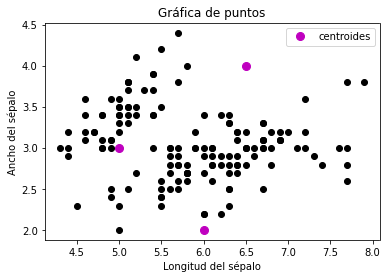

In [45]:
'''Gráfica de puntos (scatter plot)'''
#Graficaremos a las flores en función de las medidas del sépalo
plt.title('Gráfica de puntos') #Título de la gráfica
plt.xlabel('Longitud del sépalo') #Nombre del eje x
plt.ylabel('Ancho del sépalo') #Nombre del eje y
plt.plot(data['sepal.length'], data['sepal.width'], "ko")

mius = np.array([[5., 3.], [6., 2.], [6.5, 4.]])
plt.plot(mius[:, 0], mius[:, 1], "mo", markersize=8, label='centroides')

plt.legend(loc='best')

Tomamos las variables indicadas

In [61]:
X = data[["sepal.length", "sepal.width"]].values

Y entrenamos el algoritmo. Esta vez con 3 clusters y con centroides conocidos

In [57]:
n = 3
k_means = KMeans(n_clusters=n, init = mius)
k_means.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(algorithm='auto', copy_x=True,
       init=array([[5. , 3. ],
       [6. , 2. ],
       [6.5, 4. ]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [58]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

Nuevamente mostramos las **nuevas** etiquetas del conjunto de datos

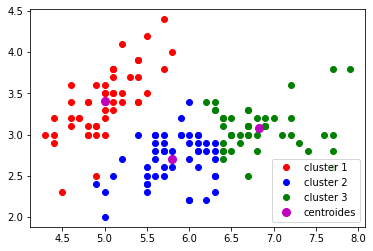

In [60]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'ro', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'bo', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'go', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

**IRIS con centroides elegidos aleatoriamente**

In [81]:
np.random.seed(0)

mius = np.random.uniform(2, 8, (3, 2))

n = 3
k_means = KMeans(n_clusters=n, init = mius)
k_means.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


KMeans(algorithm='auto', copy_x=True,
       init=array([[5.29288102, 6.2911362 ],
       [5.61658026, 5.2692991 ],
       [4.5419288 , 5.87536468]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

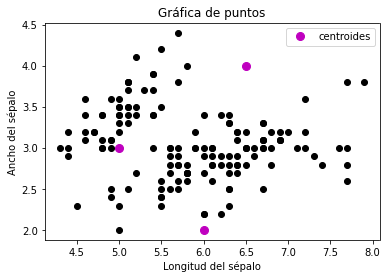

In [79]:
'''Gráfica de puntos (scatter plot)'''
#Graficaremos a las flores en función de las medidas del sépalo
plt.title('Gráfica de puntos') #Título de la gráfica
plt.xlabel('Longitud del sépalo') #Nombre del eje x
plt.ylabel('Ancho del sépalo') #Nombre del eje y
plt.plot(data['sepal.length'], data['sepal.width'], "ko")

mius = np.array([[5., 3.], [6., 2.], [6.5, 4.]])
plt.plot(mius[:, 0], mius[:, 1], "mo", markersize=8, label='centroides')

plt.legend(loc='best')

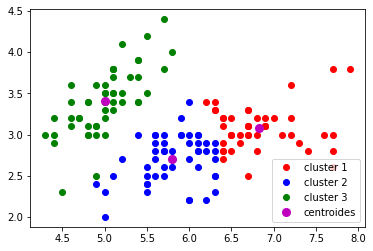

In [80]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'ro', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'bo', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'go', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()